# AI Research Assitant Assignment

* Name: Charlie (Chang Ki) Kang
* Major: MS in Computer Science (Expected Graduation Spring 2020)

# Jupyter notebook outline

* 1) Import necessary packages and libraries
* 2) Objective
* 3) Data import and conversion to numpy and dataframe objects
* 4) Exploratory data analysis
* 5) Data split and scaling
* 6) Model selection and model tuning
* 7) Result analysis and feature importance
* 8) Conclusion and acknowledgment

## 1) Import necessary packages and libraries

Pretty self explanatory. 

- numpy and pandas for data preprocessing
- matplotlib and seaborn for visualizing data
- sklearn model_selection for preprocessing and cross validation
- sklearn metrics for confusion matrix and roc curve
- rest are ML algorithms used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

import xgboost

"""This import is used to force ignore all deprecation warnings"""
import warnings
warnings.filterwarnings("ignore")

## 2) Objective

The data presented here is from UC Irvine's spam data. The data is a processed version of  spam/not spam dataset. First 54 features represent the percentage of occurences of words/chracters in a given email. No specific details as to what the words or characters each feature represents is unknown. Next three features correspond to average, longest and total number of capitalized letters in a given email.

The problem is a simple binary classificatino problem where 1 represents spam and 0 represent non-spam.

Source: http://archive.ics.uci.edu/ml/datasets/Spambase

## 3) Data import and conversion to numpy and dataframe

The data is first read and converted to both dataframe and numpy objects. DataFrame is used for visualizing some basic statistics and numpy object is fed into moels as input.

In [2]:
with open("spambase.data", "r") as f:
    content = f.readlines()

In [3]:
"""First need to convert the data into a numpy array"""
data_array = []
for i in range(len(content)):
    row = list(map(float, content[i].split(',')))
    data_array.append(row)

In [4]:
"""Convert the array into numpy and dataframe objects"""
data_array_np = np.array(data_array)
data_array_df = pd.DataFrame(data_array_np)

## 4) Exploratory data analysis (EDA)

EDA mainly consists of two parts: first part utilizes DataFrame's .describe() method to observe basic statistics numerically; second part consists of using Seaborn's distplot to see how the distribution of each features look like and compare the results to the DataFrame results.

### 4-1) Making sure the data doesn't contain any NaN or missing values

In [5]:
"""Find out if there are any null/NA values in the data"""
data_missing = data_array_df.isnull().sum()
data_missing_filtered = data_missing[data_missing > 0]
print(data_missing_filtered)

Series([], dtype: int64)


### 4-2) Descriptive Statistics using describe() method built into Pandas

In [6]:
data_array_df.iloc[:, 0:11].describe()

0            1            2            3            4   \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.104553     0.213015     0.280656     0.065425     0.312223   
std       0.305358     1.290575     0.504143     1.395151     0.672513   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.380000   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

                5            6            7            8            9   \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.095901     0.114208     0.105295     0.090067     0.239413   
std       0.273824     0.391441     0.401071     0.278616     0.644755   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.160000   
max       5.880000     7.270000    11.110000     5.260000    18.180000   

                10  
count  4601.000000  
mean      0.059824  
std       0.201545  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       2.610000

In [7]:
data_array_df.iloc[:, 11:21].describe()

11           12           13           14           15  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.541702     0.093930     0.058626     0.049205     0.248848   
std       0.861698     0.301036     0.335184     0.258843     0.825792   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.100000     0.000000     0.000000     0.000000     0.000000   
75%       0.800000     0.000000     0.000000     0.000000     0.100000   
max       9.670000     5.550000    10.000000     4.410000    20.000000   

                16           17           18           19           20  
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000  
mean      0.142586     0.184745     1.662100     0.085577     0.809761  
std       0.444055     0.531122     1.775481     0.509767     1.200810  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     1.310000     0.000000     0.220000  
75%       0.000000     0.000000     2.640000     0.000000     1.270000  
max       7.140000     9.090000    18.750000    18.180000    11.110000

In [8]:
data_array_df.iloc[:, 21:31].describe()

21           22           23           24           25  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.121202     0.101645     0.094269     0.549504     0.265384   
std       1.025756     0.350286     0.442636     1.671349     0.886955   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max      17.100000     5.450000    12.500000    20.830000    16.660000   

                26           27           28           29           30  
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000  
mean      0.767305     0.124845     0.098915     0.102852     0.064753  
std       3.367292     0.538576     0.593327     0.456682     0.403393  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max      33.330000     9.090000    14.280000     5.880000    12.500000

In [9]:
data_array_df.iloc[:, 31:41].describe()

31           32           33           34           35  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.047048     0.097229     0.047835     0.105412     0.097477   
std       0.328559     0.555907     0.329445     0.532260     0.402623   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       4.760000    18.180000     4.760000    20.000000     7.690000   

                36           37           38           39           40  
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000  
mean      0.136953     0.013201     0.078629     0.064834     0.043667  
std       0.423451     0.220651     0.434672     0.349916     0.361205  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       6.890000     8.330000    11.110000     4.760000     7.140000

In [10]:
data_array_df.iloc[:, 41:51].describe()

41           42           43           44           45  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.132339     0.046099     0.079196     0.301224     0.179824   
std       0.766819     0.223812     0.621976     1.011687     0.911119   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.110000     0.000000   
max      14.280000     3.570000    20.000000    21.420000    22.050000   

                46           47           48           49           50  
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000  
mean      0.005444     0.031869     0.038575     0.139030     0.016976  
std       0.076274     0.285735     0.243471     0.270355     0.109394  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.065000     0.000000  
75%       0.000000     0.000000     0.000000     0.188000     0.000000  
max       2.170000    10.000000     4.385000     9.752000     4.081000

In [11]:
data_array_df.iloc[:, 51:].describe()

51           52           53           54           55  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.269071     0.075811     0.044238     5.191515    52.172789   
std       0.815672     0.245882     0.429342    31.729449   194.891310   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%       0.000000     0.000000     0.000000     1.588000     6.000000   
50%       0.000000     0.000000     0.000000     2.276000    15.000000   
75%       0.315000     0.052000     0.000000     3.706000    43.000000   
max      32.478000     6.003000    19.829000  1102.500000  9989.000000   

                 56           57  
count   4601.000000  4601.000000  
mean     283.289285     0.394045  
std      606.347851     0.488698  
min        1.000000     0.000000  
25%       35.000000     0.000000  
50%       95.000000     0.000000  
75%      266.000000     1.000000  
max    15841.000000     1.000000

In [12]:
"""This shows the actual data"""
data_array_df.head()

0     1     2    3     4     5     6     7     8     9  ...     48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00 ...   0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94 ...   0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25 ...   0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...   0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...   0.00   

      49   50     51     52     53     54     55      56   57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61.0   278.0  1.0  
1  0.132  0.0  0.372  0.180  0.048  5.114  101.0  1028.0  1.0  
2  0.143  0.0  0.276  0.184  0.010  9.821  485.0  2259.0  1.0  
3  0.137  0.0  0.137  0.000  0.000  3.537   40.0   191.0  1.0  
4  0.135  0.0  0.135  0.000  0.000  3.537   40.0   191.0  1.0  

[5 rows x 58 columns]

### 4-3) Using Seaborn's distplot to visualize data

In [13]:
def plot_dist(df_data, start_ind, num_feature):
    fig, ax = plt.subplots(2, 5, figsize = (15, 4))
    col, row = 0, 0
    for i in range(num_feature):
        sns.distplot(df_data.iloc[:, start_ind + i], ax = ax[row, col], kde = False)
        col += 1
        if col == 5:
            col = 0
            row = row + 1
    fig.tight_layout()
    fig.show()

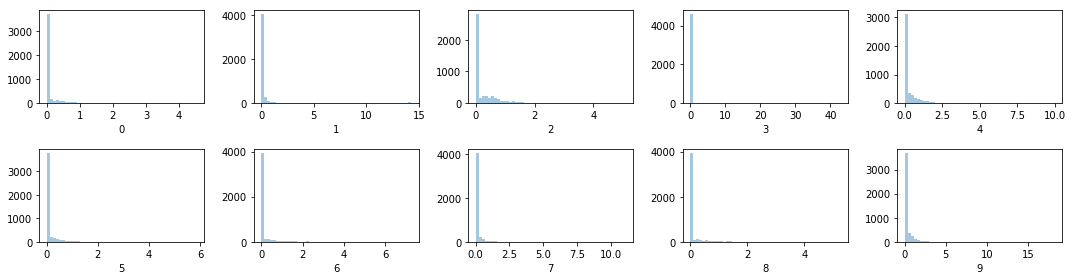

In [14]:
plot_dist(data_array_df, 0, 10)

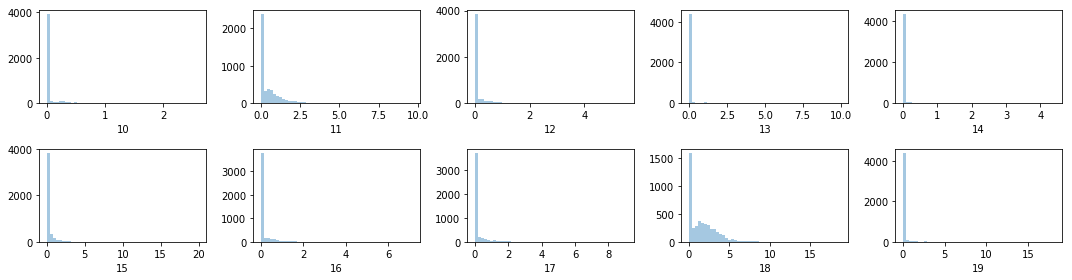

In [15]:
plot_dist(data_array_df, 10, 10)

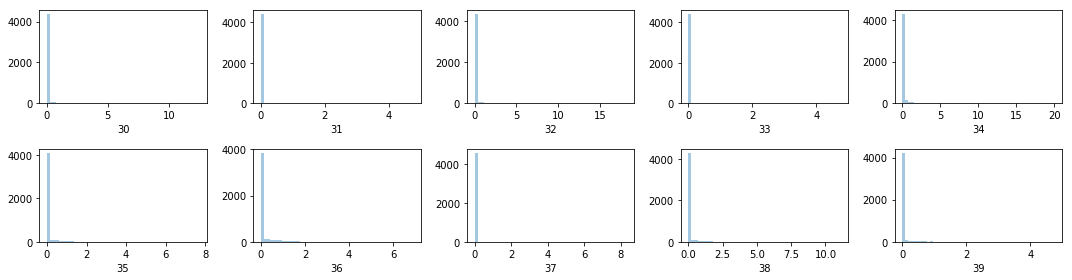

In [16]:
plot_dist(data_array_df, 30, 10)

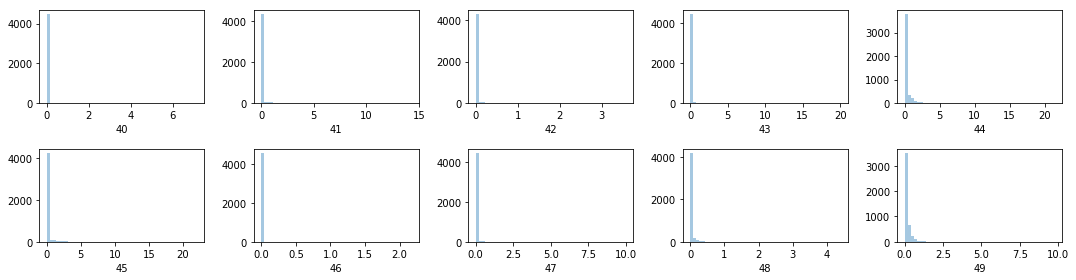

In [17]:
plot_dist(data_array_df, 40, 10)

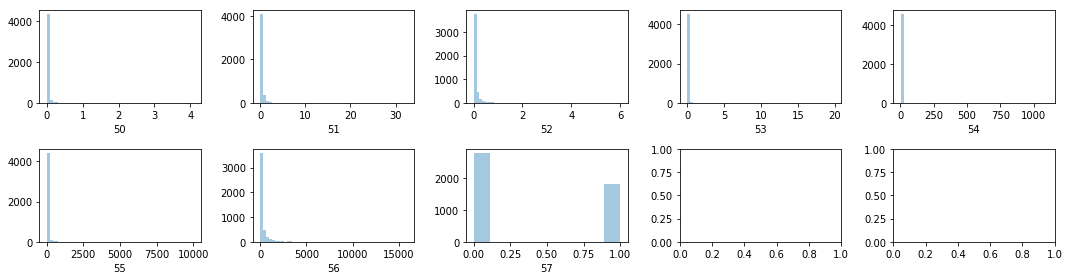

In [18]:
plot_dist(data_array_df, 50, 8)

#### Basic Observations from EDA

* No missing or NaN values present in the dataset. No need for further pre-processing of the data

* As one can see from distplots, most words occur in low frequencies in most emails. However, words corresponding to features 2, 4, 9, 11, 18 have occurences of higher frequencies. This is also self evident in the DataFrame's descriptive statistics results since thoese features tend to havae slightly higher mean value compared to other features corresponding to words

* The numeric range of features are all within specified range given by UC Irvine webpage

* Interesting to observe how some emails apparently have unrealistically long sequences of capitalized letters. I believe they may be mistakes in data, but without the original dataset, I can't 100% confirm this. It'd been interesting to have the actual raw form of the data

## 5) Data split and scaling

Since the data is fairly small, I performed 8:2 (train:test) split with stratify feature such that train and test have similar distribution of spam and non-spam data. Additionally, to help with convergence of the model, features are scaled using StandardScaler.

In [19]:
"""First separate data into x and y"""
x = data_array_np[:,:-1]
y = data_array_np[:,-1]

In [20]:
"""Now split data into train and test sets. It is a fairly small dataset, so set up test sample to be 80:20 split"""
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [21]:
print(x_train)

[[  0.      0.      0.    ...   1.911  15.     65.   ]
 [  0.      0.      0.48  ...   3.315  61.    242.   ]
 [  0.      0.      0.    ...   1.555   4.     14.   ]
 ...
 [  0.      0.      0.    ...   2.9    28.     87.   ]
 [  0.      0.      0.71  ...   1.574   6.     85.   ]
 [  0.      0.      0.    ...   1.657   8.     58.   ]]


In [22]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [23]:
print(x_train_std)

[[-0.3363972  -0.16281628 -0.55457932 ... -0.10004671 -0.27400098
  -0.36105675]
 [-0.3363972  -0.16281628  0.4135476  ... -0.05893897  0.07444124
  -0.06832662]
 [-0.3363972  -0.16281628 -0.55457932 ... -0.11047004 -0.35732412
  -0.44540272]
 ...
 [-0.3363972  -0.16281628 -0.55457932 ... -0.07108976 -0.17552818
  -0.32467221]
 [-0.3363972  -0.16281628  0.87744175 ... -0.10991373 -0.34217446
  -0.3279799 ]
 [-0.3363972  -0.16281628 -0.55457932 ... -0.10748358 -0.3270248
  -0.37263365]]


#### The false positive and false negative rates using regular train-test data split are reported with respect to this test data set size. Hence, the rates are defined as number_false_positive / number of test data and number_false_negative / number of test data respectively

In [24]:
len(y_test)

921

## 6) Model fitting

4 Models are chosen for this project. 

1) Logistic Regression - It's always a safe and simple case to apply in case the data is linearly separable.

2) Naive Bayesian - Naive Bayesian is known to perform relatively well for long text data such ass spam filters hence it was chosen to be on of the models.

3) Random Forest - A solid model in case the data needs to be separated using nonlinear technique.

4) XGBoost - The number one gradient boosting algorithm that is used a lot in Kaggle competition. In my personal experience, it always performs better than Random Forest so it was included.

* There are other good models out there too such as LightGBM, ExtremeForest, SVM etc. But these four models should cover solid basis for analysis of a relatively simple data
* For each model, with exception of Naive Bayesian, GridSearch is used to find the optimal hyperparameters. In doing so, KFold validation is used (which is given as cv = number in the GridSearchCV method call. This number will be recorded as average KFold accuracy. 
* Important thing to keep in note is that when performing cross validation, the original training data set is further divided into cross validation train and test data sets.
#### * Notice that cross vadliation is performed twice: 1) First time for hyperparameter tuning 2) To satisfy the assignment's requirement for printing out accuracy, false positive, and false negative rates of individual cross validation step

### 6-1) Logistic Regression

In [25]:
def lr_optimizer_estimator(dfX, dfY):
    '''This function is used to optimize the xgboost parameters using GridSearchCV from Scikit-learn'''
    model_lr = LogisticRegression()
    parameters = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    """GridSearchCV tuning"""
    gs = GridSearchCV(estimator = model_lr, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
    %time gs = gs.fit(dfX, dfY)
    return gs

In [26]:
grid_lr = lr_optimizer_estimator(x_train_std, y_train)

Wall time: 10.1 s


In [27]:
grid_lr.cv_results_["mean_test_score"]

array([0.60597826, 0.90733696, 0.8826087 , 0.9111413 , 0.9201087 ,
       0.92201087, 0.92608696, 0.92472826, 0.92826087, 0.92690217,
       0.92826087, 0.92798913])

#### best_score_ and best_params_ represent the KFold accuracy of the model with optimal hyperparameters and the best combination parameters found by GridSearchCV respectively

In [28]:
grid_lr_accuracy = grid_lr.best_score_
grid_lr_param = grid_lr.best_params_
print("Average KFold cross validation accuracy: ", grid_lr_accuracy)
print("Optimal Parameters: ", grid_lr_param)

Average KFold cross validation accuracy:  0.9282608695652174
Optimal Parameters:  {'C': 10, 'penalty': 'l1'}


#### Use the best model and training data to train a model using optimal hyperparameters

In [29]:
model_lr = LogisticRegression(penalty = "l1", C = 10)
model_lr.fit(x_train_std, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred_train_lr = model_lr.predict(x_train_std)
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)

y_pred_test_lr = model_lr.predict(x_test_std)
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)

In [31]:
print('Logistic Regression -----> Training accuracy: %f,  Test accuracy: %f' % (train_accuracy_lr, test_accuracy_lr))

Logistic Regression -----> Training accuracy: 0.934239,  Test accuracy: 0.931596


In [32]:
print(classification_report(y_test, y_pred_test_lr))

             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94       558
        1.0       0.91      0.91      0.91       363

avg / total       0.93      0.93      0.93       921



#### confusion_matrix method is used to extract number of false positives and false negatives. This process is applied to other models as well.

In [33]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_test_lr).ravel()

In [34]:
print(fp_lr, fn_lr)

32 31


In [35]:
print(tn_lr, tp_lr)

526 332


#### As per requirement of the assignment, a separate KFold validation is carried out

In [36]:
"""Do Kfold cross validation here"""
kf_lr = KFold(n_splits = 10, random_state = 0)

train_accuracy_compile = []
test_accuracy_compile = []
fp_compile = []
fn_compile = []
for train_index, test_index in kf_lr.split(x_train_std):
    """Model instantiation"""
    model_lr_cv = LogisticRegression(penalty = "l1", C = 10)
    """Split data into train and test of cross validation"""
    x_train_std_cv, x_test_std_cv = x_train_std[train_index], x_train_std[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model_lr_cv.fit(x_train_std_cv, y_train_cv)
    
    """Get training and test accuracy of cross validation"""
    y_pred_train_cv_lr = model_lr_cv.predict(x_train_std_cv)
    y_pred_test_cv_lr = model_lr_cv.predict(x_test_std_cv)
    
    test_size = len(y_test_cv)
    
    """Get train accuracy, test accuracy and false positive/negative rates compiled"""
    train_accuracy_cv_lr = accuracy_score(y_pred_train_cv_lr, y_train_cv)
    test_accuracy_cv_lr = accuracy_score(y_pred_test_cv_lr, y_test_cv) 
    tn_cv_lr, fp_cv_lr, fn_cv_lr, tp_cv_lr = confusion_matrix(y_test_cv, y_pred_test_cv_lr).ravel()
    
    """Compile results"""
    train_accuracy_compile.append(train_accuracy_cv_lr)
    test_accuracy_compile.append(test_accuracy_cv_lr)
    fp_compile.append(fp_cv_lr / test_size)
    fn_compile.append(fn_cv_lr / test_size)
    
cross_val_result_lr = np.array([train_accuracy_compile, test_accuracy_compile, fp_compile, fn_compile])

"""Form indices"""
index_array = []
for i in range(10):
    index_array.append("CV " + str(i + 1))

avg_train_accuracy, avg_test_accuracy, avg_fp, avg_fn  = np.mean(train_accuracy_compile), np.mean(test_accuracy_compile), np.mean(fp_compile), np.mean(fn_compile)
avg_df = pd.DataFrame([[avg_train_accuracy, avg_test_accuracy, avg_fp, avg_fn]], index = ['Avg CV Rate'], columns = ['Train accuracy', 'Test accuracy', 'False Positive Rate', 'False Negative Rate'])


cross_val_result_lr_df = pd.DataFrame(cross_val_result_lr.T, index = index_array, columns = ['Train accuracy', 'Test accuracy', 'False Positive Rate', 'False Negative Rate'])
cross_val_result_lr_df= pd.concat([cross_val_result_lr_df, avg_df])

### 6-2) Naive Bayesian

In [37]:
model_NB = GaussianNB()
model_NB.fit(x_train_std, y_train)

GaussianNB(priors=None)

In [38]:
y_pred_train_NB = model_NB.predict(x_train_std)
train_accuracy_NB = accuracy_score(y_train, y_pred_train_NB)

y_pred_test_NB = model_NB.predict(x_test_std)
test_accuracy_NB = accuracy_score(y_test, y_pred_test_NB)

In [39]:
print('Naive Bayesian -----> Training accuracy: %f,  Test accuracy: %f' % (train_accuracy_NB, test_accuracy_NB))

Naive Bayesian -----> Training accuracy: 0.818478,  Test accuracy: 0.844734


In [40]:
print(classification_report(y_test, y_pred_test_NB))

             precision    recall  f1-score   support

        0.0       0.97      0.77      0.86       558
        1.0       0.73      0.97      0.83       363

avg / total       0.88      0.84      0.85       921



In [41]:
tn_NB, fp_NB, fn_NB, tp_NB = confusion_matrix(y_test, y_pred_test_NB).ravel()

In [42]:
print(fp_NB, fn_NB)

131 12


In [43]:
print(tn_NB, tp_NB)

427 351


In [44]:
"""Do Kfold cross validation here"""
kf_NB = KFold(n_splits = 10, random_state = 0)

train_accuracy_compile = []
test_accuracy_compile = []
fp_compile = []
fn_compile = []
for train_index, test_index in kf_NB.split(x_train_std):
    """Model instantiation"""
    model_NB_cv = GaussianNB()
    """Split data into train and test of cross validation"""
    x_train_std_cv, x_test_std_cv = x_train_std[train_index], x_train_std[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model_NB_cv.fit(x_train_std_cv, y_train_cv)
    
    """Get training and test accuracy of cross validation"""
    y_pred_train_cv_NB = model_NB_cv.predict(x_train_std_cv)
    y_pred_test_cv_NB = model_NB_cv.predict(x_test_std_cv)
    
    test_size = len(y_test_cv)
    
    """Get train accuracy, test accuracy and false positive/negative rates compiled"""
    train_accuracy_cv_NB = accuracy_score(y_pred_train_cv_NB, y_train_cv)
    test_accuracy_cv_NB = accuracy_score(y_pred_test_cv_NB, y_test_cv) 
    tn_cv_NB, fp_cv_NB, fn_cv_NB, tp_cv_NB = confusion_matrix(y_test_cv, y_pred_test_cv_NB).ravel()
    
    """Compile results"""
    train_accuracy_compile.append(train_accuracy_cv_NB)
    test_accuracy_compile.append(test_accuracy_cv_NB)
    fp_compile.append(fp_cv_NB / test_size)
    fn_compile.append(fn_cv_NB / test_size)
    
cross_val_result_NB = np.array([train_accuracy_compile, test_accuracy_compile, fp_compile, fn_compile])

"""Form indices"""
index_array = []
for i in range(10):
    index_array.append("CV " + str(i + 1))

avg_train_accuracy, avg_test_accuracy, avg_fp, avg_fn  = np.mean(train_accuracy_compile), np.mean(test_accuracy_compile), np.mean(fp_compile), np.mean(fn_compile)
avg_df = pd.DataFrame([[avg_train_accuracy, avg_test_accuracy, avg_fp, avg_fn]], index = ['Avg CV Rate'], columns = ['Train accuracy', 'Test accuracy', 'False Positive Rate', 'False Negative Rate'])


cross_val_result_NB_df = pd.DataFrame(cross_val_result_NB.T, index = index_array, columns = ['Train accuracy', 'Test accuracy', 'False Positive Rate', 'False Negative Rate'])
cross_val_result_NB_df= pd.concat([cross_val_result_NB_df, avg_df])

### 6-3) Random Forest

In [45]:
def forest_optimizer_estimator(dfX, dfY):
    '''This function is used to optimize the xgboost parameters using GridSearchCV from Scikit-learn'''
    model_forest = RandomForestClassifier(n_jobs = -1, random_state = 0)
    parameters = {'max_depth': [25, 35, 45, 55, 65, 75], 'n_estimators': [200, 300, 400, 500]}
    
    gs = GridSearchCV(estimator = model_forest, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
    %time gs = gs.fit(dfX, dfY)
    return gs

In [46]:
%%time
grid_rf = forest_optimizer_estimator(x_train_std, y_train)

Wall time: 42.7 s
Wall time: 42.7 s


In [47]:
grid_rf.cv_results_["mean_test_score"]

array([0.95217391, 0.95081522, 0.95054348, 0.9513587 , 0.95271739,
       0.95190217, 0.95163043, 0.95163043, 0.95217391, 0.95244565,
       0.95190217, 0.95217391, 0.95217391, 0.95271739, 0.95190217,
       0.95217391, 0.95217391, 0.95271739, 0.95190217, 0.95217391,
       0.95217391, 0.95271739, 0.95190217, 0.95217391])

In [48]:
grid_rf_accuracy = grid_rf.best_score_
grid_rf_param = grid_rf.best_params_
print("Average KFold cross validation accuracy: " , grid_rf_accuracy)
print("Optimal Parameters: ", grid_rf_param)

Average KFold cross validation accuracy:  0.9527173913043478
Optimal Parameters:  {'max_depth': 35, 'n_estimators': 200}


In [49]:
model_forest = RandomForestClassifier(max_depth = 35, n_estimators = 200, n_jobs = -1)
model_forest.fit(x_train_std, y_train)

y_pred_train_rf = model_forest.predict(x_train_std)
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)

y_pred_test_rf = model_forest.predict(x_test_std)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

In [50]:
print('RandomForest -----> Training accuracy: %f,  Test accuracy: %f' % (train_accuracy_rf, test_accuracy_rf))

RandomForest -----> Training accuracy: 0.999457,  Test accuracy: 0.955483


In [51]:
print(classification_report(y_test, y_pred_test_rf))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       558
        1.0       0.95      0.94      0.94       363

avg / total       0.96      0.96      0.96       921



In [52]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_test_rf).ravel()

In [53]:
print(fp_rf, fn_rf)

19 22


In [54]:
print(tn_rf, tp_rf)

539 341


In [55]:
"""Do Kfold cross validation here"""
kf_rf = KFold(n_splits = 10, random_state = 0)

train_accuracy_compile = []
test_accuracy_compile = []
fp_compile = []
fn_compile = []
for train_index, test_index in kf_rf.split(x_train_std):
    """Model instantiation"""
    model_rf_cv = RandomForestClassifier(max_depth = 35, n_estimators = 200, n_jobs = -1)
    """Split data into train and test of cross validation"""
    x_train_std_cv, x_test_std_cv = x_train_std[train_index], x_train_std[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model_rf_cv.fit(x_train_std_cv, y_train_cv)
    
    """Get training and test accuracy of cross validation"""
    y_pred_train_cv_rf = model_rf_cv.predict(x_train_std_cv)
    y_pred_test_cv_rf = model_rf_cv.predict(x_test_std_cv)
    
    test_size = len(y_test_cv)
    
    """Get train accuracy, test accuracy and false positive/negative rates compiled"""
    train_accuracy_cv_rf = accuracy_score(y_pred_train_cv_rf, y_train_cv)
    test_accuracy_cv_rf = accuracy_score(y_pred_test_cv_rf, y_test_cv) 
    tn_cv_rf, fp_cv_rf, fn_cv_rf, tp_cv_rf = confusion_matrix(y_test_cv, y_pred_test_cv_rf).ravel()
    
    """Compile results"""
    train_accuracy_compile.append(train_accuracy_cv_rf)
    test_accuracy_compile.append(test_accuracy_cv_rf)
    fp_compile.append(fp_cv_rf / test_size)
    fn_compile.append(fn_cv_rf / test_size)
    
cross_val_result_rf = np.array([train_accuracy_compile, test_accuracy_compile, fp_compile, fn_compile])

"""Form indices"""
index_array = []
for i in range(10):
    index_array.append("CV " + str(i + 1))

avg_train_accuracy, avg_test_accuracy, avg_fp, avg_fn  = np.mean(train_accuracy_compile), np.mean(test_accuracy_compile), np.mean(fp_compile), np.mean(fn_compile)
avg_df = pd.DataFrame([[avg_train_accuracy, avg_test_accuracy, avg_fp, avg_fn]], index = ['Avg CV Rate'], columns = ['Train accuracy', 'Test accuracy', 'False Positive Rate', 'False Negative Rate'])


cross_val_result_rf_df = pd.DataFrame(cross_val_result_rf.T, index = index_array, columns = ['Train accuracy', 'Test accuracy', 'False Positive Rate', 'False Negative Rate'])
cross_val_result_rf_df= pd.concat([cross_val_result_rf_df, avg_df])

### 6-4) XGBoost

In [56]:
def xgboost_optimizer_estimator(dfX, dfY):
    '''This function is used to optimize the xgboost parameters using GridSearchCV from Scikit-learn'''
    model_xgb = xgboost.XGBClassifier(nthread = -1)
    parameters = {'max_depth': [5, 7, 9, 11, 13], 'n_estimators': [200, 300, 400, 500]}
    
    gs = GridSearchCV(estimator = model_xgb, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
    %time gs = gs.fit(dfX, dfY)
    return gs

In [57]:
%%time
grid_xg = xgboost_optimizer_estimator(x_train_std, y_train)

Wall time: 1min 23s
Wall time: 1min 23s


In [58]:
grid_xg_accuracy = grid_xg.best_score_
grid_xg_param = grid_xg.best_params_
print("Average KFold cross validation accuracy: ", grid_xg_accuracy)
print("Optimal Parameters: ", grid_xg_param)

Average KFold cross validation accuracy:  0.9570652173913043
Optimal Parameters:  {'max_depth': 11, 'n_estimators': 200}


In [59]:
model_xgb = xgboost.XGBClassifier(max_depth = 11, n_estimators = 200, nthread = -1)
model_xgb.fit(x_train_std, y_train)

y_pred_train_xg = model_xgb.predict(x_train_std)
train_accuracy_xg = accuracy_score(y_train, y_pred_train_xg)

y_pred_test_xg = model_xgb.predict(x_test_std)
test_accuracy_xg = accuracy_score(y_test, y_pred_test_xg)

In [60]:
print('XGBoost -----> Training accuracy: %f,  Test accuracy: %f' % (train_accuracy_xg, test_accuracy_xg))

XGBoost -----> Training accuracy: 0.999185,  Test accuracy: 0.963084


In [61]:
print(classification_report(y_test, y_pred_test_xg))

             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97       558
        1.0       0.94      0.96      0.95       363

avg / total       0.96      0.96      0.96       921



In [62]:
tn_xg, fp_xg, fn_xg, tp_xg = confusion_matrix(y_test, y_pred_test_xg).ravel()

In [63]:
print(fp_xg, fn_xg)

21 13


In [64]:
print(tn_xg, tp_xg)

537 350


In [65]:
"""Do Kfold cross validation here"""
kf_xg = KFold(n_splits = 10, random_state = 0)

train_accuracy_compile = []
test_accuracy_compile = []
fp_compile = []
fn_compile = []
for train_index, test_index in kf_xg.split(x_train_std):
    """Model instantiation"""
    model_xg_cv = xgboost.XGBClassifier(max_depth = 11, n_estimators = 200, nthread = -1)
    """Split data into train and test of cross validation"""
    x_train_std_cv, x_test_std_cv = x_train_std[train_index], x_train_std[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model_xg_cv.fit(x_train_std_cv, y_train_cv)
    
    """Get training and test accuracy of cross validation"""
    y_pred_train_cv_xg = model_xg_cv.predict(x_train_std_cv)
    y_pred_test_cv_xg = model_xg_cv.predict(x_test_std_cv)
    
    test_size = len(y_test_cv)
    
    """Get train accuracy, test accuracy and false positive/negative rates compiled"""
    train_accuracy_cv_xg = accuracy_score(y_pred_train_cv_xg, y_train_cv)
    test_accuracy_cv_xg = accuracy_score(y_pred_test_cv_xg, y_test_cv) 
    tn_cv_xg, fp_cv_xg, fn_cv_xg, tp_cv_xg = confusion_matrix(y_test_cv, y_pred_test_cv_xg).ravel()
    
    """Compile results"""
    train_accuracy_compile.append(train_accuracy_cv_xg)
    test_accuracy_compile.append(test_accuracy_cv_xg)
    fp_compile.append(fp_cv_xg / test_size)
    fn_compile.append(fn_cv_xg / test_size)
    
cross_val_result_xg = np.array([train_accuracy_compile, test_accuracy_compile, fp_compile, fn_compile])

"""Form indices"""
index_array = []
for i in range(10):
    index_array.append("CV " + str(i + 1))

avg_train_accuracy, avg_test_accuracy, avg_fp, avg_fn  = np.mean(train_accuracy_compile), np.mean(test_accuracy_compile), np.mean(fp_compile), np.mean(fn_compile)
avg_df = pd.DataFrame([[avg_train_accuracy, avg_test_accuracy, avg_fp, avg_fn]], index = ['Avg CV Rate'], columns = ['Train accuracy', 'Test accuracy', 'False Positive Rate', 'False Negative Rate'])


cross_val_result_xg_df = pd.DataFrame(cross_val_result_xg.T, index = index_array, columns = ['Train accuracy', 'Test accuracy', 'False Positive Rate', 'False Negative Rate'])
cross_val_result_xg_df = pd.concat([cross_val_result_xg_df, avg_df])

## 7) Result Analysis and Feature Importance

Random Forest allows us to do features analysis known as Feature Importance which indicates which features contained most relevant information in performing the binary classification

### 7-1) Feature Importance

 1 51                             0.119212
 2 52                             0.089287
 3 6                              0.078154
 4 54                             0.068567
 5 15                             0.064192
 6 20                             0.056681
 7 55                             0.054271
 8 56                             0.045823
 9 24                             0.044986
10 23                             0.034422
11 4                              0.033591
12 18                             0.028624
13 22                             0.024606
14 26                             0.020966
15 45                             0.019050
16 25                             0.017762
17 36                             0.013510
18 16                             0.013299
19 7                              0.012582
20 49                             0.012321
21 11                             0.011180
22 2                              0.010773
23 44                             0.010050
24 10      

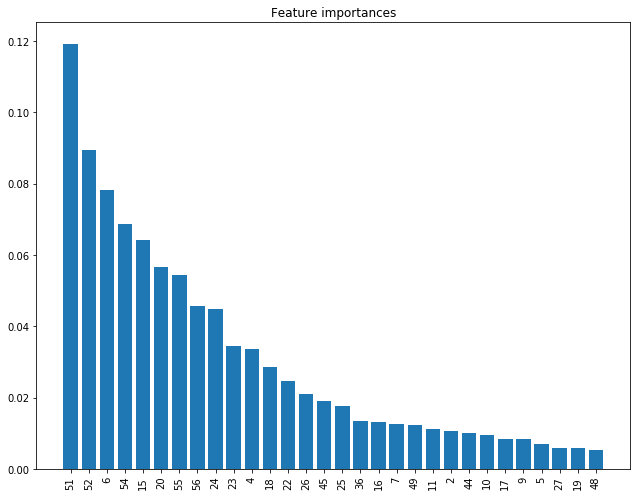

In [66]:
"""Feature Importance via Random Forest"""
feat_labels = np.array(data_array_df.columns)
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs = 3)
forest.fit(x_train_std, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
indices = indices[:30]

for f in range(len(indices)):
    print("%2d %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]] ))

plt.figure(figsize = (9, 7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()

#### Feature importance analysis

* It appears that features 51 and 52 which represent the frequency of certain character are important 
* As for indididual words, words 6 and 15 were strong indicators for distinguishing spam and non-spams
* Average length of uninterrupted sequences of capital letters, represented by feature 54, had more importance compared to length of the longest or total number of capital letters in an email

### 7-2) Cross Vadliation and Train-Test results

Just to note, the results using KFold cross validation and regular train/test data split are presented here for comparsion.

In [67]:
result_table = [[fp_lr / len(y_test), fn_lr / len(y_test), test_accuracy_lr, grid_lr_accuracy], [fp_NB / len(y_test), fn_NB / len(y_test), test_accuracy_NB, "N/A"], [fp_rf / len(y_test), fn_rf / len(y_test), test_accuracy_rf, grid_rf_accuracy], [fp_xg / len(y_test), fn_xg / len(y_test), test_accuracy_xg, grid_xg_accuracy]]
result_table_df = pd.DataFrame(result_table, index = ['Logistic Regression', 'Naive Bayesian', 'Random Forest', 'XGBoost'], columns = ['False Positive', 'False Negative', 'Test Data Accuracy', 'Avg KFold Accuracy with GridSearch'])

#### Cross Validation Result using Logistic Regression

In [68]:
cross_val_result_lr_df

Train accuracy  Test accuracy  False Positive Rate  \
CV 1               0.936292       0.899457             0.035326   
CV 2               0.932367       0.945652             0.021739   
CV 3               0.931763       0.921196             0.040761   
CV 4               0.933877       0.921196             0.024457   
CV 5               0.934179       0.926630             0.035326   
CV 6               0.937198       0.932065             0.032609   
CV 7               0.935085       0.934783             0.016304   
CV 8               0.934783       0.932065             0.024457   
CV 9               0.936896       0.934783             0.038043   
CV 10              0.938406       0.926630             0.032609   
Avg CV Rate        0.935085       0.927446             0.030163   

             False Negative Rate  
CV 1                    0.065217  
CV 2                    0.032609  
CV 3                    0.038043  
CV 4                    0.054348  
CV 5                    0.038043  
CV 6                    0.035326  
CV 7                    0.048913  
CV 8                    0.043478  
CV 9                    0.027174  
CV 10                   0.040761  
Avg CV Rate             0.042391

#### Cross Validation Result using Naive Bayesian

In [69]:
cross_val_result_NB_df

Train accuracy  Test accuracy  False Positive Rate  \
CV 1               0.821256       0.796196             0.182065   
CV 2               0.819746       0.817935             0.160326   
CV 3               0.815821       0.834239             0.157609   
CV 4               0.817331       0.853261             0.130435   
CV 5               0.814312       0.826087             0.160326   
CV 6               0.821256       0.798913             0.184783   
CV 7               0.821860       0.812500             0.165761   
CV 8               0.819143       0.809783             0.168478   
CV 9               0.825181       0.774457             0.195652   
CV 10              0.816123       0.831522             0.152174   
Avg CV Rate        0.819203       0.815489             0.165761   

             False Negative Rate  
CV 1                    0.021739  
CV 2                    0.021739  
CV 3                    0.008152  
CV 4                    0.016304  
CV 5                    0.013587  
CV 6                    0.016304  
CV 7                    0.021739  
CV 8                    0.021739  
CV 9                    0.029891  
CV 10                   0.016304  
Avg CV Rate             0.018750

#### Cross Validation Result using Random Forest

In [70]:
cross_val_result_rf_df

Train accuracy  Test accuracy  False Positive Rate  \
CV 1               0.999698       0.940217             0.021739   
CV 2               0.999698       0.967391             0.016304   
CV 3               0.999396       0.953804             0.016304   
CV 4               0.999396       0.945652             0.008152   
CV 5               0.999094       0.961957             0.008152   
CV 6               0.999396       0.948370             0.021739   
CV 7               0.999698       0.948370             0.019022   
CV 8               0.999698       0.956522             0.013587   
CV 9               0.999396       0.951087             0.032609   
CV 10              0.999396       0.942935             0.021739   
Avg CV Rate        0.999487       0.951630             0.017935   

             False Negative Rate  
CV 1                    0.038043  
CV 2                    0.016304  
CV 3                    0.029891  
CV 4                    0.046196  
CV 5                    0.029891  
CV 6                    0.029891  
CV 7                    0.032609  
CV 8                    0.029891  
CV 9                    0.016304  
CV 10                   0.035326  
Avg CV Rate             0.030435

#### Cross Validation Result using XGBoost

In [71]:
cross_val_result_xg_df

Train accuracy  Test accuracy  False Positive Rate  \
CV 1               0.999396       0.937500             0.021739   
CV 2               0.999396       0.972826             0.016304   
CV 3               0.999094       0.967391             0.016304   
CV 4               0.999094       0.959239             0.008152   
CV 5               0.999094       0.967391             0.010870   
CV 6               0.999094       0.956522             0.027174   
CV 7               0.999396       0.961957             0.019022   
CV 8               0.999698       0.956522             0.019022   
CV 9               0.998792       0.940217             0.038043   
CV 10              0.999094       0.940217             0.029891   
Avg CV Rate        0.999215       0.955978             0.020652   

             False Negative Rate  
CV 1                    0.040761  
CV 2                    0.010870  
CV 3                    0.016304  
CV 4                    0.032609  
CV 5                    0.021739  
CV 6                    0.016304  
CV 7                    0.019022  
CV 8                    0.024457  
CV 9                    0.021739  
CV 10                   0.029891  
Avg CV Rate             0.023370

#### Results using train-test data split

Naive Bayesian is missing the average KFold accuracy report with GridSearch because no GridSearch is performed on the model

In [72]:
result_table_df.head()

False Positive  False Negative  Test Data Accuracy  \
Logistic Regression        0.034745        0.033659            0.931596   
Naive Bayesian             0.142237        0.013029            0.844734   
Random Forest              0.020630        0.023887            0.955483   
XGBoost                    0.022801        0.014115            0.963084   

                    Avg KFold Accuracy with GridSearch  
Logistic Regression                           0.928261  
Naive Bayesian                                     N/A  
Random Forest                                 0.952717  
XGBoost                                       0.957065

#### Remarks

* Naive Bayesian performed a bit worse than I expected. I'd like to see how it performs when we have dataset with larger number features where the assumption of Naive Bayes can become very useful
* With introduction of nonlinearity in Random Forest and XGBoost, the results improve but Logistic Regression still does perform relatively well, which implies the data is actaully fairly linearly separable case. But, as usual, added nonlinearity always form more complex boundary conditions which often allow higher accuracy
* As expected, XGBoost does perform a bit better than Random Forest but not by a significant margin. As noted above, the data is simple enough that simpler models are probably sufficient to reasonably separate the data into spam and non-spam
* The results from cross vadliation are in accordance with simple train-test data split approach. This is expected since even the regular train-test approach went through a cross validation in hyperparameter tuning (except for Naive Bayes)

## 8) Conclusion and Acknowledgment

* In terms of pure accuracy score, XGBoost performed best overall


* However, if I were to design a spam filter, I would be more concerned with false positive rate since you really do not want non-spams classified as spams. This does happen in real life though. People do get non-spam emails that get sent directly to junk because the email provider's spam filter recognizes it as a spam. In the current model, XGBoost has slightly better false negative performance while RandomForest has slightly better false positive performance (Not by significant margins though on both metrics).

This assignment is carried out as part of application to Information Sciences Institute's research assistant position in the Summer of 2019